In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from netCDF4 import Dataset

# conda install -c conda-forge xarray dask netCDF4 bottleneck

# Xarry user guide!
### https://docs.xarray.dev/en/latest/user-guide/weather-climate.html

# Load Data

In [2]:
#ds = xr.open_dataset('./sst.mnmean.nc')
#ds

# ERSSTv5 dataset : https://psl.noaa.gov/data/gridded/data.noaa.ersst.v5.html
nc = Dataset('./sst.mnmean.nc', 'r')
ds = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))
ds

<xarray.Dataset>
Dimensions:    (lat: 89, lon: 180, time: 2036, nbnds: 2)
Coordinates:
  * lat        (lat) float32 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon        (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time       (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-08-01
Dimensions without coordinates: nbnds
Data variables:
    time_bnds  (time, nbnds) float64 ...
    sst        (time, lat, lon) float32 ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2023-09-03

In [3]:
print("Dimensions: ",ds.dims)
#print("Coordinates: ",ds.coords)
#print("Variable Name: ",ds.data_vars)
#print("Indexes: ",ds.indexes)
#print("Attribute: ",ds.attrs)

Dimensions:  Frozen({'lat': 89, 'lon': 180, 'time': 2036, 'nbnds': 2})


In [4]:
# select your target
sst = ds['sst']
print(sst.shape)

(2036, 89, 180)


# Select data (indexing)
### https://docs.xarray.dev/en/latest/user-guide/indexing.html

### time indexing

In [5]:
# select 'JAN 2001'
sst_selected = sst.sel(time='2001-01')
sst_selected

<xarray.DataArray 'sst' (time: 1, lat: 89, lon: 180)>
[16020 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2001-01-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [6]:
# select  'JAN 2001 ~ DEC 2010'
sst_selected = sst.sel(time=slice('2001-01', '2010-12'))
sst_selected

<xarray.DataArray 'sst' (time: 120, lat: 89, lon: 180)>
[1922400 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2010-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [7]:
# select 'JAN 2001 & APR 2004 & OCT 2010'
sst_selected = sst.sel(time=['2001-01', '2004-04', '2010-10'])
sst_selected

<xarray.DataArray 'sst' (time: 3, lat: 89, lon: 180)>
[48060 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 88.0 86.0 84.0 82.0 80.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 2001-01-01 2004-04-01 2010-10-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

### spatial indexing

In [8]:
# select lon: 124. & lat: 36.
sst_selected = sst.sel(lat=36., lon=124.)
sst_selected

<xarray.DataArray 'sst' (time: 2036)>
[2036 values with dtype=float32]
Coordinates:
    lat      float32 36.0
    lon      float32 124.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [9]:
# select lon: 123. & lat: 36.
# check the user guide for more options ('pad', 'backfill')
sst_selected = sst.sel(lat=36., lon=123., method='nearest')
sst_selected


<xarray.DataArray 'sst' (time: 2036)>
[2036 values with dtype=float32]
Coordinates:
    lat      float32 36.0
    lon      float32 124.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [10]:
# select lon: 120.~125. & lat: 33.~38.
sst_selected = sst.sel(lat=slice(38.,33.), lon=slice(120.,125.))
sst_selected

<xarray.DataArray 'sst' (time: 2036, lat: 3, lon: 3)>
[18324 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 38.0 36.0 34.0
  * lon      (lon) float32 120.0 122.0 124.0
  * time     (time) datetime64[ns] 1854-01-01 1854-02-01 ... 2023-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [11]:
# select your area of interest and time period
sst_selected = sst.sel(time=slice('1950-01', '2021-12'), lat=slice(5.,-5.), lon=slice(190.,240.))
sst_selected

<xarray.DataArray 'sst' (time: 864, lat: 5, lon: 26)>
[112320 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2021-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

# Averaging

### temporal average
### https://docs.xarray.dev/en/latest/user-guide/time-series.html
### https://docs.xarray.dev/en/latest/examples/monthly-means.html

In [12]:
# time average
sst_averaged = sst_selected.mean(dim='time')
sst_averaged

<xarray.DataArray 'sst' (lat: 5, lon: 26)>
array([[28.314688, 28.21597 , 28.120714, 28.026266, 27.929495, 27.831345,
        27.735506, 27.644258, 27.554296, 27.47076 , 27.3999  , 27.337088,
        27.275255, 27.208406, 27.137562, 27.07484 , 27.033455, 27.003227,
        26.963919, 26.911976, 26.867716, 26.83868 , 26.806162, 26.762598,
        26.724743, 26.698515],
       [28.043324, 27.917654, 27.80012 , 27.679354, 27.555532, 27.439573,
        27.339355, 27.245213, 27.139359, 27.031311, 26.930593, 26.843388,
        26.753798, 26.658777, 26.559423, 26.466236, 26.385414, 26.308556,
        26.222841, 26.133049, 26.05798 , 25.997877, 25.92872 , 25.847424,
        25.775246, 25.719303],
       [27.958387, 27.828135, 27.703947, 27.580065, 27.449804, 27.325674,
        27.221619, 27.123451, 27.004484, 26.865318, 26.741154, 26.62632 ,
        26.508877, 26.387096, 26.262901, 26.138695, 26.016832, 25.895458,
        25.775333, 25.652477, 25.52996 , 25.413244, 25.295597, 25.181667,
        25.081211, 24.992428],
       [28.250517, 28.135647, 28.023306, 27.90745 , 27.786299, 27.667532,
        27.558895, 27.456041, 27.335304, 27.195045, 27.06392 , 26.94039 ,
        26.814917, 26.68517 , 26.556347, 26.428236, 26.293797, 26.156359,
        26.019316, 25.876734, 25.72208 , 25.566   , 25.42319 , 25.296011,
        25.178995, 25.06521 ],
       [28.684584, 28.586147, 28.489233, 28.38945 , 28.285355, 28.174198,
        28.065613, 27.954762, 27.839504, 27.713118, 27.590096, 27.472475,
        27.348007, 27.22341 , 27.102837, 26.979967, 26.8465  , 26.708385,
        26.57035 , 26.425365, 26.263733, 26.09911 , 25.948536, 25.815825,
        25.689352, 25.56107 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0

In [13]:
# yearly average (groupby)
sst_averaged = sst_selected.groupby("time.year").mean("time")
sst_averaged

<xarray.DataArray 'sst' (year: 72, lat: 5, lon: 26)>
array([[[27.131441, 26.993301, 26.83563 , ..., 25.966583, 25.921942,
         25.895288],
        [26.661407, 26.508928, 26.383532, ..., 24.979189, 24.893415,
         24.814049],
        [26.425406, 26.31347 , 26.228025, ..., 24.3128  , 24.233717,
         24.133818],
        [26.705503, 26.62268 , 26.559174, ..., 24.423483, 24.335768,
         24.209913],
        [27.299948, 27.218588, 27.16908 , ..., 24.945105, 24.809578,
         24.694023]],

       [[28.342264, 28.232855, 28.161036, ..., 26.80998 , 26.810186,
         26.81523 ],
        [28.188675, 28.09887 , 28.055632, ..., 26.00624 , 25.963388,
         25.924006],
        [28.104347, 28.018845, 27.934801, ..., 25.449324, 25.39942 ,
         25.337234],
        [28.339376, 28.269913, 28.201532, ..., 25.5423  , 25.47631 ,
         25.415895],
        [28.628723, 28.548323, 28.486177, ..., 25.965958, 25.889174,
...
         26.617434],
        [28.106234, 27.946486, 27.7977  , ..., 25.523214, 25.459068,
         25.41899 ],
        [27.999018, 27.83297 , 27.678862, ..., 24.727373, 24.616844,
         24.534918],
        [28.366953, 28.216894, 28.070877, ..., 24.846361, 24.709984,
         24.594511],
        [28.933062, 28.802572, 28.669226, ..., 25.469406, 25.333466,
         25.200373]],

       [[28.032179, 27.92198 , 27.806482, ..., 26.395866, 26.377028,
         26.363192],
        [27.602911, 27.47809 , 27.35427 , ..., 25.32956 , 25.278711,
         25.244188],
        [27.447195, 27.315855, 27.188993, ..., 24.579643, 24.490526,
         24.42037 ],
        [27.781946, 27.65873 , 27.538488, ..., 24.71284 , 24.598726,
         24.496061],
        [28.339172, 28.225508, 28.113213, ..., 25.31367 , 25.205019,
         25.083567]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * year     (year) int64 1950 1951 1952 1953 1954 ... 2017 2018 2019 2020 2021
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [14]:
# yearly average (resample)
sst_averaged = sst_selected.resample(time='1Y').mean()
sst_averaged

<xarray.DataArray 'sst' (time: 72, lat: 5, lon: 26)>
array([[[27.131441, 26.993301, 26.83563 , ..., 25.966583, 25.921942,
         25.895288],
        [26.661407, 26.508928, 26.383532, ..., 24.979189, 24.893415,
         24.814049],
        [26.425406, 26.31347 , 26.228025, ..., 24.3128  , 24.233717,
         24.133818],
        [26.705503, 26.62268 , 26.559174, ..., 24.423483, 24.335768,
         24.209913],
        [27.299948, 27.218588, 27.16908 , ..., 24.945105, 24.809578,
         24.694023]],

       [[28.342264, 28.232855, 28.161036, ..., 26.80998 , 26.810186,
         26.81523 ],
        [28.188675, 28.09887 , 28.055632, ..., 26.00624 , 25.963388,
         25.924006],
        [28.104347, 28.018845, 27.934801, ..., 25.449324, 25.39942 ,
         25.337234],
        [28.339376, 28.269913, 28.201532, ..., 25.5423  , 25.47631 ,
         25.415895],
        [28.628723, 28.548323, 28.486177, ..., 25.965958, 25.889174,
...
         26.617434],
        [28.106234, 27.946486, 27.7977  , ..., 25.523214, 25.459068,
         25.41899 ],
        [27.999018, 27.83297 , 27.678862, ..., 24.727373, 24.616844,
         24.534918],
        [28.366953, 28.216894, 28.070877, ..., 24.846361, 24.709984,
         24.594511],
        [28.933062, 28.802572, 28.669226, ..., 25.469406, 25.333466,
         25.200373]],

       [[28.032179, 27.92198 , 27.806482, ..., 26.395866, 26.377028,
         26.363192],
        [27.602911, 27.47809 , 27.35427 , ..., 25.32956 , 25.278711,
         25.244188],
        [27.447195, 27.315855, 27.188993, ..., 24.579643, 24.490526,
         24.42037 ],
        [27.781946, 27.65873 , 27.538488, ..., 24.71284 , 24.598726,
         24.496061],
        [28.339172, 28.225508, 28.113213, ..., 25.31367 , 25.205019,
         25.083567]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1950-12-31 1951-12-31 ... 2021-12-31
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [15]:
# yearly average (groupby) with weights
month_length = sst_selected.time.dt.days_in_month
weights = month_length.groupby("time.year")/month_length.groupby("time.year").sum()
sst_averaged = (sst_selected*weights).groupby("time.year").sum(dim="time")
sst_averaged

<xarray.DataArray (year: 72, lat: 5, lon: 26)>
array([[[27.13690556, 26.99936867, 26.84202408, ..., 25.96629138,
         25.92142584, 25.89450942],
        [26.66827224, 26.51655312, 26.39147813, ..., 24.97785281,
         24.89175647, 24.81198864],
        [26.43240336, 26.32125526, 26.23609765, ..., 24.31091447,
         24.23145192, 24.1310541 ],
        [26.71116019, 26.62906034, 26.56585528, ..., 24.42144053,
         24.33335942, 24.20709201],
        [27.30331272, 27.2225535 , 27.1733832 , ..., 24.94311702,
         24.8072765 , 24.69146117]],

       [[28.35005144, 28.24032086, 28.16838847, ..., 26.81344611,
         26.8132094 , 26.81802702],
        [28.19733783, 28.10723288, 28.06398251, ..., 26.00892351,
         25.96546477, 25.92558419],
        [28.11305538, 28.02733274, 27.94334333, ..., 25.45138889,
         25.40074482, 25.33774232],
        [28.34723994, 28.27765695, 28.20932912, ..., 25.54388327,
         25.47713121, 25.41576712],
        [28.63500902, 28.55452312, 28.49235897, ..., 25.96696972,
...
         26.6245331 , 26.61655756],
        [28.104313  , 27.94457352, 27.79580454, ..., 25.52122249,
         25.4569561 , 25.41663232],
        [27.99677575, 27.83081131, 27.67676585, ..., 24.72434152,
         24.6136704 , 24.53144507],
        [28.36464394, 28.21471073, 28.06877588, ..., 24.84306046,
         24.70651096, 24.59073403],
        [28.93083387, 28.80044626, 28.66719294, ..., 25.46644467,
         25.33030686, 25.19693803]],

       [[28.03827954, 27.92813976, 27.81271029, ..., 26.39629004,
         26.37687784, 26.36255113],
        [27.60940478, 27.48460825, 27.36078844, ..., 25.32790968,
         25.2764148 , 25.24124129],
        [27.4533621 , 27.32204271, 27.19511668, ..., 24.57661507,
         24.48686986, 24.415934  ],
        [27.78697085, 27.66383289, 27.54354295, ..., 24.70939428,
         24.59474451, 24.49135389],
        [28.34243624, 28.22889456, 28.11662757, ..., 25.31053665,
         25.20142819, 25.07940605]]])
Coordinates:
  * lat      (lat) float32 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * year     (year) int64 1950 1951 1952 1953 1954 ... 2017 2018 2019 2020 2021

In [16]:
# seasonal average
month_length = sst_selected.time.dt.days_in_month
weights = month_length.groupby("time.season")/month_length.groupby("time.season").sum()
sst_averaged = (sst_selected*weights).groupby("time.season").sum(dim="time")
sst_averaged

<xarray.DataArray (season: 4, lat: 5, lon: 26)>
array([[[27.93542413, 27.82549643, 27.71595412, 27.59983389,
         27.48096798, 27.36878659, 27.26267344, 27.16316284,
         27.06272477, 26.95799148, 26.86428022, 26.79258528,
         26.73549883, 26.67275375, 26.60105622, 26.5412379 ,
         26.51185698, 26.49292477, 26.46075324, 26.41748046,
         26.38186061, 26.35779202, 26.33400673, 26.31880602,
         26.31765855, 26.29929437],
        [27.65173148, 27.50359543, 27.36454366, 27.22441909,
         27.08772606, 26.96438712, 26.85851687, 26.76447768,
         26.65932765, 26.54097356, 26.42610427, 26.3338194 ,
         26.24807709, 26.16321412, 26.07343182, 25.98831279,
         25.92701377, 25.87958827, 25.81717962, 25.73747801,
         25.66355238, 25.60555652, 25.54850514, 25.49552111,
         25.45326662, 25.40247937],
        [27.6057448 , 27.44152589, 27.28735295, 27.1452067 ,
         27.00792733, 26.88074705, 26.77266575, 26.67662875,
         26.56296916, 26.42231945, 26.29363952, 26.17851918,
         26.06387937, 25.95042037, 25.83397459, 25.71306854,
         25.60795109, 25.52142607, 25.43407091, 25.32723927,
         25.20984067, 25.10050135, 24.99807283, 24.90653147,
...
         27.39890675, 27.25802931, 27.14298974, 27.0187082 ,
         26.86102118, 26.68094045, 26.51059383, 26.3420656 ,
         26.17013231, 26.00145883, 25.83240569, 25.65519965,
         25.47286403, 25.28376132, 25.09287261, 24.90665196,
         24.7252088 , 24.54593515, 24.36823418, 24.19640589,
         24.02855616, 23.86512122],
        [28.27088613, 28.12880933, 27.98318501, 27.82766915,
         27.672376  , 27.53425043, 27.40821069, 27.27409895,
         27.11286544, 26.93038553, 26.75092847, 26.56939132,
         26.3846807 , 26.20620518, 26.03370673, 25.85571983,
         25.67052311, 25.48389992, 25.28800603, 25.07978815,
         24.8659011 , 24.65551684, 24.45899573, 24.27379243,
         24.09060478, 23.90981972],
        [28.66036358, 28.53552418, 28.40640475, 28.26891303,
         28.13284808, 28.00209265, 27.87470247, 27.73227136,
         27.57772074, 27.40998881, 27.24180375, 27.07320864,
         26.89589405, 26.72380146, 26.56014824, 26.39096286,
         26.21300513, 26.03995933, 25.86155773, 25.66405504,
         25.45206512, 25.24134528, 25.0422309 , 24.85393009,
         24.66517322, 24.47559947]]])
Coordinates:
  * lat      (lat) float32 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [17]:
# resampling 3 months
sst_averaged = sst_selected.resample(time='3M', closed='left').mean()
sst_averaged

<xarray.DataArray 'sst' (time: 288, lat: 5, lon: 26)>
array([[[26.366379, 26.176222, 25.982185, ..., 25.629936, 25.65654 ,
         25.69304 ],
        [25.75915 , 25.538948, 25.374472, ..., 24.70075 , 24.691109,
         24.687014],
        [25.559904, 25.372427, 25.24983 , ..., 24.093542, 24.087807,
         24.076927],
        [26.07418 , 25.915802, 25.813196, ..., 24.282812, 24.256952,
         24.214197],
        [27.007812, 26.86558 , 26.775438, ..., 24.910751, 24.824133,
         24.769953]],

       [[27.334272, 27.171991, 27.005396, ..., 26.974258, 27.015543,
         27.06486 ],
        [27.005072, 26.81655 , 26.674086, ..., 26.007948, 26.012102,
         26.038483],
        [26.815672, 26.665636, 26.565573, ..., 25.317474, 25.339071,
         25.352003],
        [27.056944, 26.945219, 26.874931, ..., 25.471563, 25.490402,
         25.465242],
        [27.57579 , 27.473085, 27.415047, ..., 25.993134, 25.958038,
...
         26.10733 ],
        [28.241766, 28.115953, 27.981401, ..., 25.077957, 24.956892,
         24.848734],
        [27.985245, 27.851007, 27.706636, ..., 24.209131, 24.051073,
         23.904236],
        [28.128395, 28.00524 , 27.871115, ..., 24.256783, 24.080978,
         23.913544],
        [28.443796, 28.335281, 28.220352, ..., 24.87371 , 24.718626,
         24.552666]],

       [[28.033318, 27.931532, 27.809816, ..., 25.451094, 25.369802,
         25.311213],
        [27.437212, 27.319267, 27.185175, ..., 24.075533, 23.959269,
         23.855942],
        [27.218752, 27.084753, 26.935755, ..., 23.19914 , 23.048157,
         22.901375],
        [27.58953 , 27.455606, 27.304098, ..., 23.383562, 23.211197,
         23.040281],
        [28.218254, 28.091507, 27.951714, ..., 24.16632 , 23.998688,
         23.8151  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1950-03-31 1950-06-30 ... 2021-12-31
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [18]:
# running mean 3 months
sst_averaged = sst_selected.rolling(time=3, center=True).mean()
sst_averaged

<xarray.DataArray 'sst' (time: 864, lat: 5, lon: 26)>
array([[[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]],

       [[26.366379, 26.176222, 25.982185, ..., 25.629936, 25.65654 ,
         25.69304 ],
        [25.75915 , 25.538948, 25.374472, ..., 24.70075 , 24.691109,
         24.687014],
        [25.559904, 25.372427, 25.24983 , ..., 24.093542, 24.087807,
         24.076927],
        [26.07418 , 25.915802, 25.813196, ..., 24.282812, 24.256952,
         24.214197],
        [27.007812, 26.86558 , 26.775438, ..., 24.910751, 24.824133,
...
         25.311203],
        [27.43718 , 27.319265, 27.185202, ..., 24.075499, 23.959288,
         23.855932],
        [27.218758, 27.084759, 26.93575 , ..., 23.199148, 23.048126,
         22.901337],
        [27.58958 , 27.455603, 27.304085, ..., 23.38352 , 23.211159,
         23.04026 ],
        [28.21823 , 28.091503, 27.951706, ..., 24.166334, 23.998693,
         23.815052]],

       [[      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 4.0 2.0 0.0 -2.0 -4.0
  * lon      (lon) float32 190.0 192.0 194.0 196.0 ... 234.0 236.0 238.0 240.0
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2021-12-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

### spatial average
### https://docs.xarray.dev/en/latest/examples/area_weighted_temperature.html

In [19]:
# area average
weights = np.cos(np.deg2rad(sst_averaged.lat))
sst_averaged = sst_averaged.weighted(weights).mean(('lon', 'lat'))
sst_averaged

<xarray.DataArray 'sst' (time: 864)>
array([      nan, 25.168566, 25.744915, 26.119822, 26.316402, 26.31392 ,
       26.209236, 25.963636, 25.764395, 25.625834, 25.479452, 25.336634,
       25.423775, 25.963423, 26.742762, 27.476736, 27.74898 , 27.748737,
       27.444576, 27.275095, 27.143063, 27.22225 , 27.120937, 26.947153,
       26.780663, 26.87075 , 27.248863, 27.595272, 27.593416, 27.16543 ,
       26.666857, 26.390776, 26.300201, 26.173586, 26.124784, 26.286427,
       26.64815 , 27.103083, 27.5344  , 27.959133, 28.140907, 27.938318,
       27.490162, 27.117298, 26.931755, 26.913603, 26.916235, 26.952545,
       27.003729, 26.97207 , 26.862986, 26.890924, 26.8505  , 26.668577,
       26.103483, 25.544123, 25.25103 , 25.29954 , 25.349543, 25.481401,
       25.56599 , 25.889053, 26.218996, 26.497911, 26.601915, 26.444937,
       26.06108 , 25.639135, 25.06212 , 24.645008, 24.409195, 24.721205,
       25.229021, 25.861818, 26.366331, 26.818123, 26.931913, 26.720566,
       26.234241, 25.872318, 25.71188 , 25.674372, 25.668509, 25.767612,
       26.094364, 26.678677, 27.40856 , 28.07485 , 28.370487, 28.343023,
       28.057241, 27.749462, 27.502796, 27.4809  , 27.637478, 27.94081 ,
       28.14878 , 28.274097, 28.260616, 28.282133, 28.187164, 27.866426,
       27.379938, 26.85124 , 26.56173 , 26.530193, 26.602797, 26.81099 ,
       26.95462 , 27.24001 , 27.509426, 27.680878, 27.644802, 27.16239 ,
       26.626448, 26.145378, 26.08099 , 26.065985, 26.152355, 26.160824,
...
       27.534653, 27.31671 , 27.12931 , 26.975456, 26.725151, 26.41047 ,
       26.209732, 26.44325 , 26.958523, 27.386057, 27.47098 , 27.245012,
       26.890858, 26.636866, 26.50915 , 26.538652, 26.506014, 26.349056,
       26.207594, 26.398136, 27.017422, 27.719109, 28.030354, 27.80217 ,
       27.327833, 27.01144 , 26.987688, 27.196283, 27.300356, 27.272848,
       27.190119, 27.345804, 27.831888, 28.384258, 28.760841, 28.834408,
       28.808563, 28.81212 , 28.921602, 29.134285, 29.249018, 29.26136 ,
       29.125883, 29.011614, 28.886066, 28.632692, 28.229836, 27.59402 ,
       26.941624, 26.424446, 26.14491 , 26.032743, 26.015686, 26.061947,
       26.302673, 26.710966, 27.346447, 27.884644, 28.128214, 27.968243,
       27.43954 , 26.849003, 26.382458, 26.062218, 25.835024, 25.643097,
       25.722988, 26.020756, 26.602427, 27.188427, 27.617588, 27.654848,
       27.396473, 27.201582, 27.267975, 27.486576, 27.58397 , 27.447742,
       27.406813, 27.616144, 28.0311  , 28.368612, 28.394007, 28.125643,
       27.59522 , 27.120634, 26.974913, 27.084902, 27.206469, 27.185753,
       27.1489  , 27.362827, 27.707266, 27.884441, 27.7576  , 27.359423,
       26.895094, 26.394   , 25.886005, 25.559422, 25.414022, 25.442205,
       25.598429, 25.945272, 26.462282, 27.034052, 27.350796, 27.281773,
       26.897034, 26.469109, 26.094307, 25.906464, 25.698326,       nan],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2021-12-01

# Calculate anomalies

In [20]:
climatology = sst_averaged.groupby("time.month").mean("time")
sst_anomalies = sst_averaged.groupby("time.month") - climatology
sst_anomalies

<xarray.DataArray 'sst' (time: 864)>
array([            nan, -1.56415558e+00, -1.37470627e+00, -1.35326195e+00,
       -1.27928925e+00, -1.11132050e+00, -8.72217178e-01, -7.99676895e-01,
       -8.13711166e-01, -8.98801804e-01, -1.01073647e+00, -1.13877678e+00,
       -1.09932327e+00, -7.69298553e-01, -3.76859665e-01,  3.65257263e-03,
        1.53287888e-01,  3.23497772e-01,  3.63122940e-01,  5.11781693e-01,
        5.64956665e-01,  6.97614670e-01,  6.30748749e-01,  4.71742630e-01,
        2.57564545e-01,  1.38029099e-01,  1.29241943e-01,  1.22188568e-01,
       -2.27546692e-03, -2.59809494e-01, -4.14596558e-01, -3.72537613e-01,
       -2.77904510e-01, -3.51049423e-01, -3.65404129e-01, -1.88983917e-01,
        1.25051498e-01,  3.70361328e-01,  4.14779663e-01,  4.86049652e-01,
        5.45215607e-01,  5.13078690e-01,  4.08708572e-01,  3.53984833e-01,
        3.53649139e-01,  3.88967514e-01,  4.26046371e-01,  4.77134705e-01,
        4.80630875e-01,  2.39349365e-01, -2.56635666e-01, -5.82159042e-01,
       -7.45191574e-01, -7.56662369e-01, -9.77970123e-01, -1.21919060e+00,
       -1.32707596e+00, -1.22509575e+00, -1.14064598e+00, -9.94009018e-01,
       -9.57107544e-01, -8.43667984e-01, -9.00625229e-01, -9.75172043e-01,
       -9.93776321e-01, -9.80302811e-01, -1.02037239e+00, -1.12417793e+00,
       -1.51598549e+00, -1.87962723e+00, -2.08099365e+00, -1.75420570e+00,
       -1.29407692e+00, -8.70903015e-01, -7.53290176e-01, -6.54960632e-01,
       -6.63778305e-01, -7.04673767e-01, -8.47211838e-01, -8.90995026e-01,
...
        2.34349632e+00,  2.60964966e+00,  2.75882912e+00,  2.78594971e+00,
        2.60278511e+00,  2.27889252e+00,  1.76644516e+00,  1.15960884e+00,
        6.34143829e-01,  1.68781281e-01, -1.39829636e-01, -3.38867188e-01,
       -4.33195114e-01, -4.91891861e-01, -4.74502563e-01, -4.13463593e-01,
       -2.20424652e-01, -2.17552185e-02,  2.26825714e-01,  4.11560059e-01,
        5.32522202e-01,  5.43003082e-01,  3.58087540e-01,  8.56895447e-02,
       -1.95648193e-01, -4.62417603e-01, -6.55164719e-01, -8.32313538e-01,
       -8.00109863e-01, -7.11965561e-01, -5.17194748e-01, -2.84656525e-01,
        2.18963623e-02,  2.29608536e-01,  3.15019608e-01,  4.38268661e-01,
        6.89868927e-01,  9.61940765e-01,  1.09378052e+00,  9.72332001e-01,
        8.83714676e-01,  8.83422852e-01,  9.11478043e-01,  8.95528793e-01,
        7.98315048e-01,  7.00403214e-01,  5.13767242e-01,  3.57320786e-01,
        3.96806717e-01,  5.60266495e-01,  7.16279984e-01,  7.10342407e-01,
        6.25801086e-01,  6.30105972e-01,  5.87644577e-01,  4.11357880e-01,
        1.61909103e-01, -6.58168793e-02, -1.86359406e-01, -3.69314194e-01,
       -6.92100525e-01, -9.65213776e-01, -1.07616615e+00, -1.03320503e+00,
       -9.24669266e-01, -7.87448883e-01, -6.57339096e-01, -4.39031601e-01,
       -2.44895935e-01, -1.43466949e-01, -1.84419632e-01, -2.94204712e-01,
       -4.83798981e-01, -6.18171692e-01, -7.91862488e-01,             nan],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2021-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

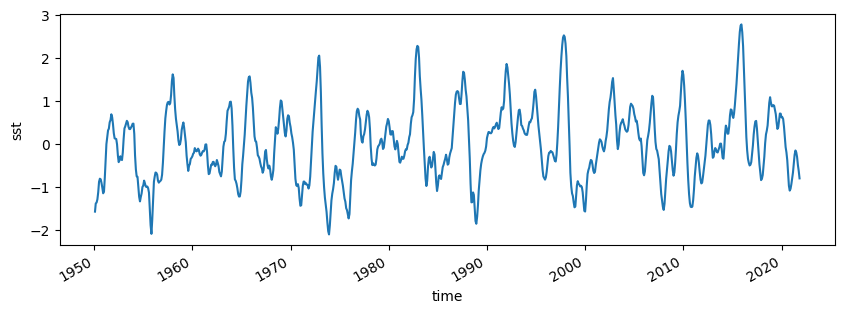

In [21]:
# Nino3.4 index
sst_anomalies.plot(figsize=(10,3))